In [115]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
tickers=['GS','GOOG']
stock_data={}
for ticker in tickers:
  temp=yf.download(ticker,period='60mo')
  temp.dropna(how='any',inplace=True)
  stock_data[ticker]=temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [124]:
df=stock_data['GOOG']

In [125]:
per9high=df['High'].rolling(window=9).max()
per9low=df['Low'].rolling(window=9).min()
tenka_sen=(per9high+per9low)/2

In [126]:
per26high=df['High'].rolling(window=26).max()
kijun_sen=(per9low+per26high)/2

In [127]:
chiko_span=df['Close'].shift(-26)

In [128]:
ten_kiju=(tenka_sen+kijun_sen)/2
senkou_spanA=ten_kiju.shift(26)

In [129]:
per52high=df['High'].rolling(window=52).max()
per52low=df['Low'].rolling(window=52).min()
avg52highlow=(per52high+per52low)/2
senkou_spanB=avg52highlow.shift(26)

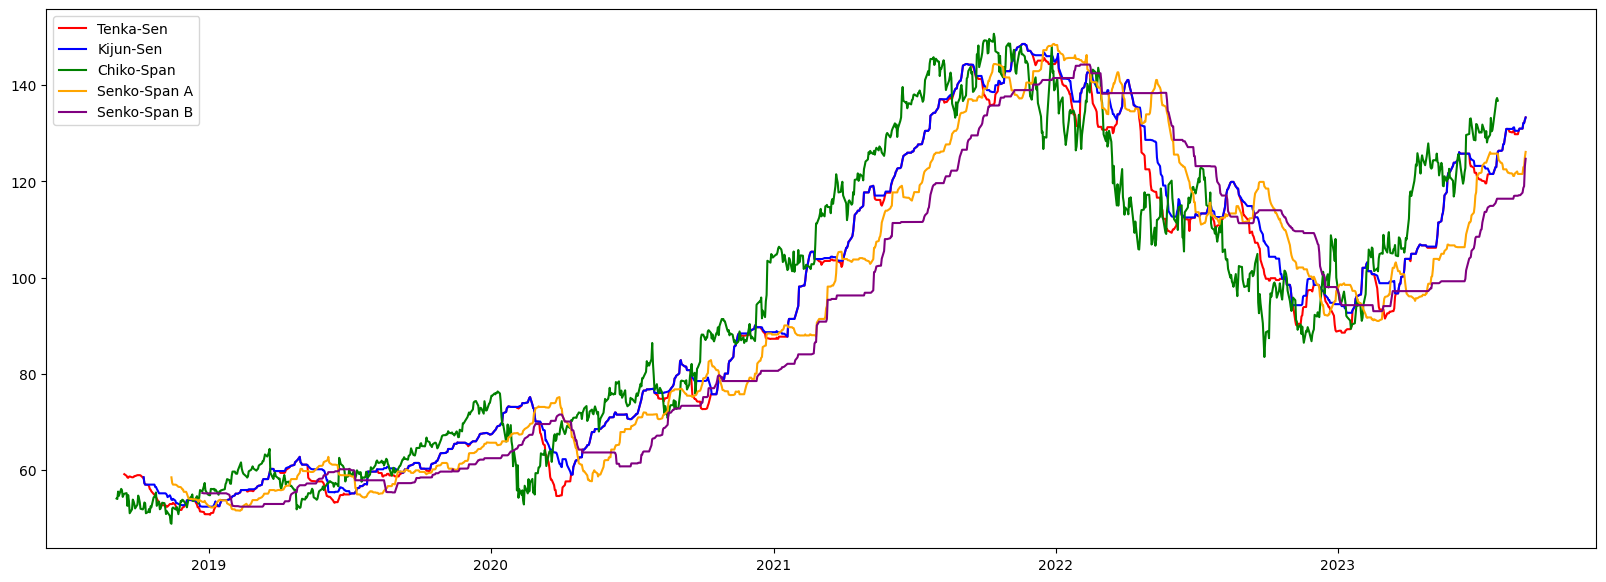

In [130]:
plt.figure(figsize=(20,7))
plt.plot(tenka_sen,label='Tenka-Sen',color='red')
plt.plot(kijun_sen,label='Kijun-Sen',color='blue')
plt.plot(chiko_span,label='Chiko-Span',color='green')
plt.plot(senkou_spanA,label='Senko-Span A',color='orange')
plt.plot(senkou_spanB,label='Senko-Span B',color='purple')
plt.legend()
plt.savefig('Ichimoku.png')